[ 1  1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1
 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1
 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1
 -1  1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1
  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1  1 -1 -1  1 -1  1 -1]


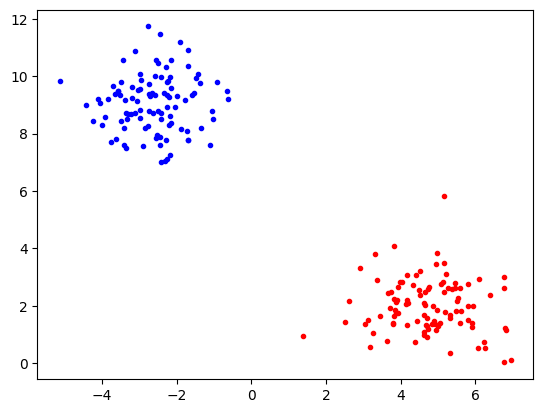

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(42)

X, y = make_blobs(n_samples=200, centers=2)
idxs_1 = np.argwhere(y==1)
idxs_0 = np.argwhere(y==0)
X1 = X[np.reshape(idxs_1, idxs_1.size)]
X0 = X[np.reshape(idxs_0, idxs_0.size)]

plt.plot(X0[:,0], X0[:,1], 'b.', X1[:,0], X1[:,1], 'r.')
y[y==0] -= 1

In [ ]:
class SVM:
    """ 
    A regularized kernel SVM 
    
    ...

    Attributes
    ----------
    C : float
        The inverse regularization parameter
    kernel: str
        The kernel type (e.g. linear, gaussian_rbf, etc..)

    Methods
    -------
    train(X,y):
        Trains the model on the dataset (X,y)

    predict(q):
        Makes a prediction about query point q
    """
    def __init__(self, C, kernel="linear"):
        self.C = C
        self.kernel = kernel

    def _compute_w(self, X, y, alpha):
        """ Use representer theorem to retrieve w from alpha """
        N, D = X.shape

        w = np.zeros(D)
        for i in range(N):
            w += alpha[i]*y[i]*X[i]

        return w

    def _compute_b(self, y, alpha, K):
        N = K.shape[0]

        # Pick a point on the margin's boundary

        b = 0
        for i in range(N):
            # TODO: Pick up here
            continue

    def _has_converged(self, X, y, alpha, K, eps):
        """ Check if alpha values have converged """
        w = self._compute_w(X, y, alpha)
        b = self._compute_b(y, alpha, K)

        # TODO: Pick up here
    
    def train(self, X, y):
        """ Train the classifier using the SMO algorithm """
        N, D = X.shape

        # Picking feasible alpha
        alpha = np.zeros(N)
        eps = 0.01
        converged = False

        # Compute Kernel
        if self.kernel == "gaussian":
            K = self.compute_gaussian_kernel(X)
        else:
            K = self.compute_linear_kernel(X)

        i = 1 # use i (as idx of s) and i-1 (as idx of r) as alpha idxs
        while not converged:
            masked_alpha = np.copy(alpha)

            # Zero out alpha_r and alpha_s to vectorize
            masked_alpha[i-1] = 0
            masked_alpha[i] = 0
            zeta = -alpha@y

            # Reassigning alpha_s
            alpha[i] = (1/y[i])*(zeta - alpha[i-1])

            # Coefficient a of the quadratic expression in alpha_r
            a = -(1/2)*(y[i-1]**2*K[i-1,i-1]+y[i-1]**2*K[i,i]-2*y[i-1]**2*K[i-1,i])

            # Coefficient b of the quadratic expression in alpha_r
            sum = 0
            for j in range(N):
                if j == i or j == i-1:
                    continue

                sum += alpha[j]*y[j]*(K[i,j]-K[i-1,j])
                
            b = 1-y[i]**(-1)*y[i-1]+zeta*y[i-1]*(K[i,i]-K[i-1,i])+(1/2)*y[i-1]*sum

            proposed_alpha_r = -b/(2*a)

            # Check if constraints are satisfied
            feasible = False
            if y[i-1] == y[i]:
                if proposed_alpha_r <= min(self.C, y[i-1]*zeta):
                    if proposed_alpha_r >= max(0, -y[i-1]*(y[i]*self.C-zeta)):
                        feasible = True
            else:
                if proposed_alpha_r <= min(self.C, -y[i-1]*(y[i]*self.C-zeta)):
                    if proposed_alpha_r >= max(0, y[i-1]*zeta):
                        feasible = True

            if feasible:
                alpha[i-1] = proposed_alpha_r
                alpha[i] = y[i]**(-1)*(zeta-proposed_alpha_r*y[i-1])

            converged = self._has_converged(X, y, alpha, K, eps)
            
            i += 1
            if i >= N:
                i = i % N
                
        # TODO Use representer theorem to convert alpha to weights

    def compute_gaussian_kernel(self, X, sigma=1.0):
        pass

    def compute_linear_kernel(self, X):
        return X@X.T

    def predict(self, q):
        # TODO Use representer theorem t